# What Makes a Hit?
# Predicting the Popularity of a Songs on Spotify

### Presented by Malachi Hale

## Executive Summary
### Background

Spotify is the world's largest music and audio streaming service provider. Spotify has a library of over 70 million tracks. Each of the tracks in Spotify's library receives a number indicating that track's popularity index. The popularity index is structured such that 0 is the least popular and 100 is the most popular. 

Spotify has an algorithm which calculates each tracks popularity index score based on how many plays the track receives, as well as how recent those plays were. 

To begin with, we acquired a sample of Spotify library as of April 2021. Our data contains:
 - 586,672 tracks in the Spotify library, 
 - descriptive features of each track, and 
 - the songs popularity index as of April 16, 2021.

Our data sources is located here: 
 - https://www.kaggle.com/subhaskumarray/spotify-tracks-data
 
**A Note on Spotify's Descriptive Features**

Many of the descriptive features that Spotify assigns to some of its tracks are questionable. For example, audiobooks often get a high "danceability" score. Clearly, it is not reasonable to call an audiobook with no music "danceable". It is not clear how Spotify assigns each descriptive feature to each track in their API.

The purpose of this project, however, is to use Spotify's own attributes to predict Spotify's own popularity index score. Thus, we will use the attributes from Spotify's own API to build our models, even when we may personally disagree that these attributes accurately describe the tracks.

**Project Goal**

In this project, we pose the question: can we use features of each track to predict where the track is likely to place on the popularity index? More specifically, can we build a model that uses features of tracks to predict that tracks placement on the popularity index?

**Outline** 

We will take the following steps:
 - **Acquire** data from the Spotify API from April 2021. 
 - **Prepare** the data by 
     - imputing null values, 
     - making columns easier to process, 
     - removing outliers, 
     - splitting data into train, validate, and test datasets, 
     - and adding scaled columns.
 - **Explore** the data by creating visualizations, running feature engineering, and creating cluster groupings. 
 - **Model** the data to predict popularity of each song. 
 
**Key findings**

We will demonstrate that it is possible to use the features of each track to predict that track's popularity, with a higher validity than the baseline model. 

**Recommendation**

In this project, I used the models I was familiar with to make predictions about each track's popularity. There may be more effective models with which I am not familiar. This is worth exploring to predict a song's popularity. 

## Import Libraries

In [1]:
#Disable Warnings
import warnings
warnings.filterwarnings("ignore")

#Import pandas for dataframes
import pandas as pd

#Graphing imports
import seaborn as sns
import matplotlib.pyplot as plt

#Prepare functions 
from prepare import prepare_data
from prepare import data_no_outliers
from prepare import split_data
from prepare import add_scaled_columns

#Import for Clustering 
from sklearn.cluster import KMeans

#Import stastitics
from scipy import stats

#Sklearn imports for processing data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error

import opendatasets as od

## Acquire Data

We have previously downloaded the data into a CSV file in this repository. We will read that CSV into a DataFrame below.

In [ ]:
df = pd.read_csv(r'/Users/malachihale/codeup-data-science/End-to-End-Project/tracks.csv')

In [113]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [114]:
len(df)

586672

We have 58,672 tracks in our dataset.

In [115]:
df[df.release_date == df.release_date.max()].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
86695,0usLN2VpccZQwWkGLm3Odm,2013 Will Be My Year,0,161045,0,['Jay and Others :>'],['3pwVqfe1xCnGTTnbVjYf74'],2021-04-16,0.347,0.965,10,-6.014,1,0.1420,0.05040,0.000000,0.3430,0.392,90.987,4
92864,1Nlstdx5q4GVUyaQqHYvqh,Inner City Life - 2020 Remaster,0,422183,0,['Goldie'],['2SYqJ3uDLLXZNyZdLKBy4M'],2021-04-16,0.384,0.889,7,-6.548,1,0.0936,0.00226,0.425000,0.0728,0.112,154.886,4
93915,4BvreMl8IerW37NLYtBZ9e,Blow Your Mind (Mwah),0,178583,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2021-04-16,0.677,0.796,2,-4.761,0,0.1170,0.01880,0.000000,0.0948,0.494,108.851,4
93916,4K9PNGfQMYnMsY9zEDKDLC,Break My Heart,0,352453,0,"['Dua Lipa', 'Moodymann']","['6M2wZ9GZgrQXHCFfjv46we', '6pohviZSNRueSX7uNu...",2021-04-16,0.772,0.637,4,-7.846,0,0.0494,0.02200,0.035300,0.0898,0.409,113.022,4
93917,5xZAMT6xqi8sXUHcccwzK2,Love Again,0,258004,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2021-04-16,0.659,0.667,11,-4.668,0,0.0339,0.00173,0.000029,0.1000,0.468,115.982,4


Above are some of the most recent songs in our dataset. Recall this is data from April 2021. Perhaps you may recognize some of the titles. 

In [116]:
df.sort_values(by = "popularity", ascending = False).head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


Above are the most popular songs in our dataset. "Peaches" by Justin Bieber featuring Daniel Caesar and Giveon is the most popular song as of the week of April 16, 2021.

### Visualizations of Univariate Data

Below are the distributions of each of the variables in our dataset.

#### Popularity

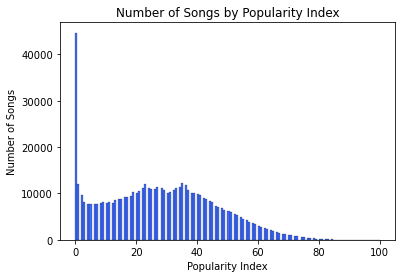

In [117]:
sns.set_palette('bright')
popularity = sns.histplot(x = df.popularity)
labels = popularity.set(ylabel = "Number of Songs", xlabel = "Popularity Index", title = "Number of Songs by Popularity Index")

The score 0 appears to be most common on the popularity index.

In [118]:
len(df[df.popularity == 0])/len(df)

0.07617544385960127

**Note**

Our data represents a sample of some of the most popular songs on Spotify. The majority of Spotify's 70 million tracks of a popularity index of 0. In our data, only around 7.6% of the tracks have a popularity index of 0.

#### Duration

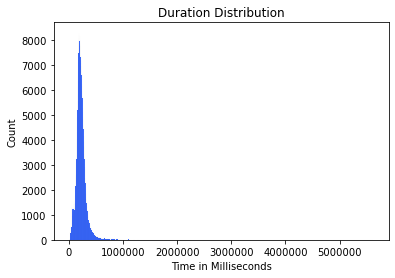

In [119]:
duration = sns.histplot(df.duration_ms)
duration.ticklabel_format(useOffset=False, style='plain')
labels = duration.set(title = "Duration Distribution", xlabel = "Time in Milliseconds")

There appears to be some extreme outliers in length in our dataset.

In [120]:
df.sort_values(by = 'duration_ms', ascending = False).head(1)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
326329,3EEv9UCeZdn4MVFv8tsO1E,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,3,5621218,0,['ท่านพุทธทาส'],['2ySk9zib3PuomvMGmCqdTA'],1979-07-28,0.638,0.537,8,-13.365,1,0.775,0.825,0.0,0.345,0.401,131.446,3


In [121]:
df.duration_ms.median()

214893.0

The longest track is around 90 minutes long (it appears to be an extended religious prayer), whereas the median song is only around 3 and a half minutes long. 

#### Explicit

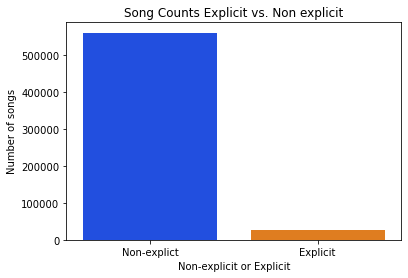

In [122]:
explicit = sns.countplot(df.explicit)
explicit.set_xticklabels(['Non-explict','Explicit'])
labels = explicit.set(ylabel = "Number of songs", xlabel = "Non-explicit or Explicit", title = "Song Counts Explicit vs. Non explicit")

There are far more non-explicit songs that explicit songs.

#### Artist

Below is a chart of the the top twenty artists with the most tracks in the dataset.

In [123]:
df[['artists', 'id']].groupby('artists').count().sort_values(by = "id", ascending = False).head(20)

,id
artists,
['Die drei ???'],3856
['TKKG Retro-Archiv'],2006
['Benjamin Blümchen'],1503
['Bibi Blocksberg'],1472
['Lata Mangeshkar'],1373
['Bibi und Tina'],927
"['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']",905
['Francisco Canaro'],891
['Ella Fitzgerald'],870


#### Release date

In [124]:
df.release_date = pd.to_datetime(df.release_date)


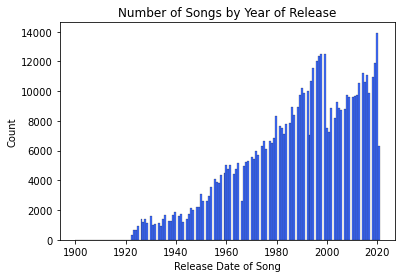

In [125]:
release_dates = sns.histplot(df.release_date.dt.year)
labels = release_dates.set(xlabel = "Release Date of Song", title = "Number of Songs by Year of Release")

Our sample includes more modern songs. However, there seems to be many 90s and modern songs in particular.

#### Danceability

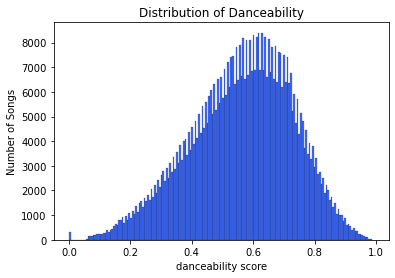

In [126]:
danceability = sns.histplot(df.danceability)
labels = danceability.set(xlabel = "danceability score", ylabel = "Number of Songs", title = "Distribution of Danceability")

Danceability of the tracks is roughly normally distributed.

#### Energy 

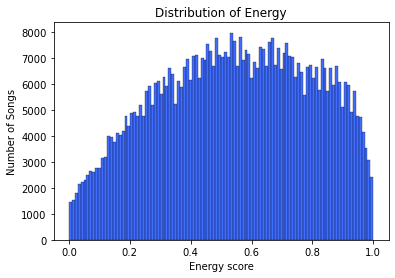

In [127]:
energy = sns.histplot(df.energy)
labels = energy.set(xlabel = "Energy score", ylabel = "Number of Songs", title = "Distribution of Energy")

Energy of each song is roughyl normally distributed.

#### Key

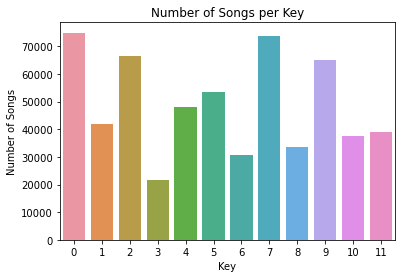

In [128]:
key = sns.countplot(df.key)
labels = key.set(xlabel = "Key", ylabel = "Number of Songs", title = "Number of Songs per Key")

#### Loudness

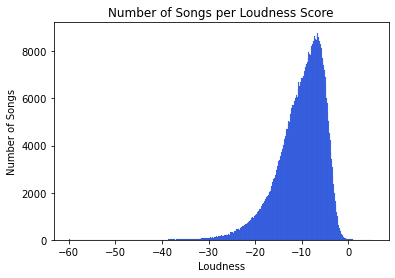

In [129]:
loudness = sns.histplot(df.loudness)
labels = loudness.set(xlabel = "Loudness", ylabel = "Number of Songs", title = "Number of Songs per Loudness Score")

Loudness is roughly normally distributed with a left skew.

#### Mode

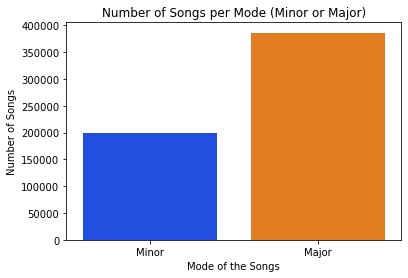

In [130]:
mode = sns.countplot(df['mode'])
mode.set_xticklabels(['Minor','Major'])
labels = mode.set(xlabel = "Mode of the Songs", ylabel = "Number of Songs", title = "Number of Songs per Mode (Minor or Major)")

#### Speechiness

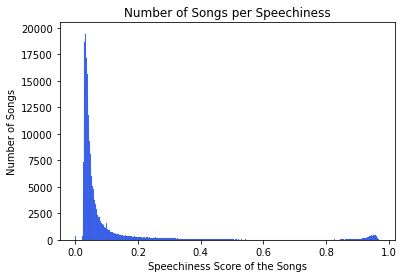

In [131]:
speechiness = sns.histplot(df['speechiness'])
labels = speechiness.set(xlabel = "Speechiness Score of the Songs", ylabel = "Number of Songs", title = "Number of Songs per Speechiness")

#### Acousticness

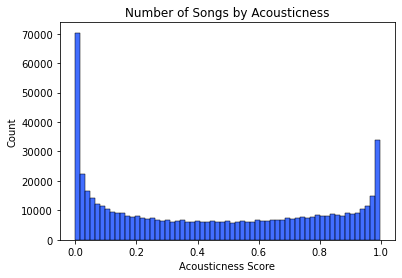

In [132]:
acousticness = sns.histplot(df.acousticness)
labels = acousticness.set(xlabel = "Acousticness Score", title = "Number of Songs by Acousticness")

#### Instrumentalness

**Note**

There were so many tracks with instrumentalness at 0 that the graph appeared empty if we simply graphed the raw data. Below we only graph the tracks with instrumentalness above 0.01.

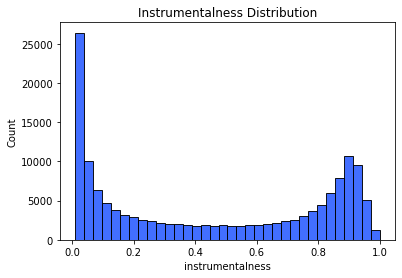

In [133]:
instrumentalness = sns.histplot(df[df.instrumentalness > 0.01].instrumentalness)
labels = instrumentalness.set(title = "Instrumentalness Distribution")

#### Liveness

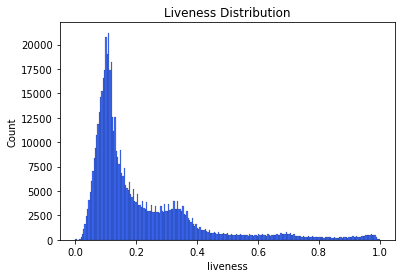

In [134]:
liveness = sns.histplot(df.liveness)
labels = liveness.set(title = "Liveness Distribution")

Liveness is right skew.

#### Tempo

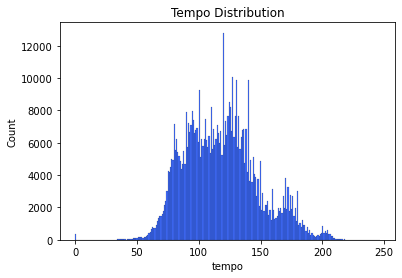

In [135]:
tempo = sns.histplot(df.tempo)
labels = tempo.set(title = "Tempo Distribution")

Tempo is roughly normally distributed.

#### Time Signature

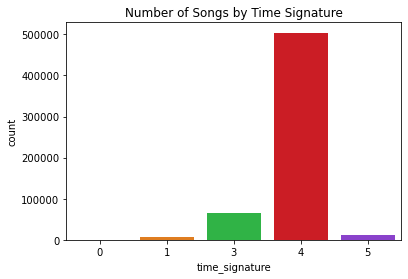

In [136]:
time_signature = sns.countplot(df.time_signature)
labels = time_signature.set(title = "Number of Songs by Time Signature")

Unsurprisingly, 4/4 beats are most common.

## Prepare Data

Please see the `prepare.py` file in this repository for more information about the functions used to prepare the data in this section.

### Handle Missing Values

In [137]:
df = prepare_data(df)

ValueError: SimpleImputer does not support data with dtype datetime64[ns]. Please provide either a numeric array (with a floating point or integer dtype) or categorical data represented either as an array with integer dtype or an array of string values with an object dtype.

### Remove Outliers

In [ ]:
df = data_no_outliers(df)

In [ ]:
df = df.reset_index()

In [ ]:
len(df)

We have removed over 10_000 rows from the dataset.

### Date Column

For this project, I am going to conver the `release_date` column into `year_of_release`, since some of the values in the `release_date` column only contain data for year.

In [138]:
df['year_of_release'] = pd.to_datetime(df.release_date)
df['year_of_release'] = df['year_of_release'].dt.year

### Train, Validate, Test Split

In [139]:
train, validate, test = split_data(df)

In [140]:
len(train)

328535

In [141]:
len(validate)

140802

In [142]:
len(test)

117335

### Add Scaled Columns

Since `loudness` and `duration_ms` are not on the 0 to 1 scale, we scale those features using the Min-Max Scaler.

In [143]:
train, validate, test = add_scaled_columns(train, validate, test)

In [144]:
train.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled
404070,4RoQxXt8eSKeSFmhxLXu3x,Oru Ooril,39,279467,0,['Karthik'],['0LSPREIgGMZXCuKVel7LVD'],2003-09-27,0.594,0.633,...,0.1530,0.281000,0.000000,0.0559,0.757,169.779,4,2003,0.051132,0.818305
319183,6FxUiq2HJbjyj4dBnXumrb,Lay down (Candles in the rain),7,274274,0,['Emilíana Torrini'],['08j69Ndyx1P7RLO3Janb5P'],1996-01-01,0.305,0.726,...,0.0344,0.183000,0.000000,0.1340,0.592,167.728,4,1996,0.050171,0.809412
545921,3GcY5WwLab9cMJimIIqSh1,Playful,28,167413,0,['Frankie Animal'],['1YYYGhGZWuWjLTpxdggqpO'],2019-06-07,0.595,0.594,...,0.0359,0.040500,0.000066,0.1340,0.566,90.053,4,2019,0.030382,0.781858
113274,0EvOQBSyW3uSfwpcaj5xLe,Time - 2013 Remaster,11,315855,0,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy'],2015-09-25,0.330,0.652,...,0.0398,0.192000,0.000003,0.1050,0.369,145.186,4,2015,0.057871,0.787433
112835,4i3ilJFJbMwLLK3g0ECkXp,Jy Soen Soos 'n Engel,22,228653,0,['David Fourie'],['3372wrCwHX44K1vjwiZHoA'],2011-04-04,0.601,0.953,...,0.0364,0.000192,0.000000,0.0971,0.731,125.964,4,2011,0.041723,0.834877


In [145]:
validate.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled
105487,1sTlRQmceHgGpaR013sQeF,"Mozart: Clarinet Concerto in A Major, K. 622: ...",39,399000,0,"['Wolfgang Amadeus Mozart', 'Sabine Meyer', 'H...","['4NJhFmfw43RLBLjQvxDuRS', '6kuAjH8jM4yaKQhZek...",1990-01-01,0.120,0.0384,...,0.0425,0.980,0.768000,0.1040,0.0714,92.792,4,1990,0.073268,0.566281
357570,5NwwdS18Tv8rrYhKTg1W7s,Trotoari,17,214158,1,"['Jluch', 'Gena']","['1u5aZFA7fAmHyKsn5EkyW3', '5vtStZw4AeZWdJi8C8...",2015-04-20,0.639,0.4810,...,0.2120,0.589,0.000000,0.1290,0.5680,75.020,4,2015,0.039039,0.753782
220588,5zx5KkMqAMpOHBi96WP0if,יצאנו אט,11,175213,0,['Arik Einstein'],['16XberediOtO5CaMrx85cR'],1966-12-01,0.522,0.3010,...,0.0300,0.907,0.000000,0.2640,0.5480,80.688,4,1966,0.031827,0.735520
289161,0u7U6KJU5C5YEncP2MpKTt,Pedia Ton Dromon,21,253920,0,['Eleni Tsaligopoulou'],['3Gk7fuRSYuQWqXGhRGPsG4'],1984-03-14,0.738,0.8390,...,0.0491,0.182,0.000000,0.0507,0.8930,96.020,4,1984,0.046402,0.881291
379587,0rJZpj5wxVBCVBUoqildQj,Les gens qui doutent,47,216400,0,"['Jeanne Cherhal', 'Vincent Delerm', 'Albin de...","['782B4UZNgZiVf5uVS5P35h', '3Uo7E7lR9Li0qXzxU8...",2007-10-29,0.383,0.5260,...,0.0872,0.922,0.000813,0.7640,0.3200,94.824,3,2007,0.039454,0.736503


In [146]:
test.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled
239867,0FhgD9zuStSJZpos20gFtV,Minha Lagoa (Our Lagoon),11,176000,0,['Luiz Henrique'],['2mbbD0cLZxosXdwG7aVals'],1967-01-01,0.653,0.416,...,0.0416,0.663000,0.000116,0.0833,0.8200,81.457,4,1967,0.031972,0.679783
246765,5GFIZfNxJo3crKCT1twUjL,"Wagner: Tristan und Isolde, WWV 90, Act 3 Scen...",2,229627,0,"['Richard Wagner', 'Josef Greindl', 'Philharmo...","['1C1x4MVkql8AiABuTw6DgE', '2vZXFmXCmzwuS35JDT...",1953-01-01,0.131,0.396,...,0.0385,0.945000,0.121000,0.2030,0.0359,85.023,4,1953,0.041903,0.720791
93968,7D1qj2gfg2XyHbwUyLydE2,That's What I Like,0,205080,0,['Bruno Mars'],['0du5cEVh5yTK9QJze8zA0C'],2021-04-16,0.852,0.551,...,0.0416,0.014600,0.000000,0.0898,0.8500,134.061,4,2021,0.037357,0.845490
46081,09eg3FGzsZQbZk8qEXhJIA,Stop Breaking Down,41,274773,0,['The Rolling Stones'],['22bE4uQ6baNwSHPVcDxLCe'],1972-05-12,0.522,0.891,...,0.0322,0.509000,0.908000,0.1110,0.9100,104.411,4,1972,0.050263,0.858791
200642,4Xjko8MZh1UGtvSFdMDeAk,Horizon (FYHYM2018) - Aether Mix,2,58000,0,"['Andrew Rayel', 'Lola Blanc', 'Aether']","['1UtBjqMZBAmqIPlDrKu7Tr', '3n1yZfKIQhSaPjF1LZ...",2018-12-27,0.404,0.868,...,0.0714,0.000008,0.000787,0.9050,0.3410,132.059,4,2018,0.010121,0.842910


## Explore

### Feature Engineering

I will use feature engineering to determine which features are most likely predictive of `popularity`. To use, feature engineering, we first split the data between our features and our target.

In [147]:
train.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year_of_release',
       'duration_ms_scaled', 'loudness_scaled'],
      dtype='object')

In [148]:
X_train = train[['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release']]
y_train = train['popularity']
X_validate = validate[['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release']]
y_validate = validate.popularity
X_test = test[['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release']]
y_test = test.popularity

In [149]:
len(X_train.columns)

15

In [150]:
len(X_validate.columns)

15

In [151]:
len(X_test.columns)

15

We will select the best features from our 15 columns.

#### Select K Best Model

In [152]:
# Create model
kbest_6 = SelectKBest(f_regression, k=6)
#Fit the model
kbest_6.fit(X_train, y_train)
X_train.columns[kbest_6.get_support()]

Index(['explicit', 'energy', 'acousticness', 'instrumentalness',
       'loudness_scaled', 'year_of_release'],
      dtype='object')

In [153]:
# Create model
kbest_7 = SelectKBest(f_regression, k=7)
#Fit the model
kbest_7.fit(X_train, y_train)
X_train.columns[kbest_7.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness',
       'instrumentalness', 'loudness_scaled', 'year_of_release'],
      dtype='object')

In [154]:
# Create model
kbest_8 = SelectKBest(f_regression, k=8)
#Fit the model
kbest_8.fit(X_train, y_train)
X_train.columns[kbest_8.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness',
       'instrumentalness', 'time_signature', 'loudness_scaled',
       'year_of_release'],
      dtype='object')

In [155]:
# Create model
kbest_9 = SelectKBest(f_regression, k=9)
#Fit the model
kbest_9.fit(X_train, y_train)
X_train.columns[kbest_9.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness',
       'instrumentalness', 'tempo', 'time_signature', 'loudness_scaled',
       'year_of_release'],
      dtype='object')

In [156]:
# Create model
kbest_10 = SelectKBest(f_regression, k=10)
#Fit the model
kbest_10.fit(X_train, y_train)
X_train.columns[kbest_10.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'tempo', 'time_signature',
       'loudness_scaled', 'year_of_release'],
      dtype='object')

#### Recursive Feature Elimination

In [157]:
rfe_6 = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe_6.fit(X_train, y_train)
X_train.columns[rfe_6.get_support()]

Index(['explicit', 'danceability', 'acousticness', 'instrumentalness',
       'valence', 'loudness_scaled'],
      dtype='object')

In [158]:
rfe_7 = RFE(estimator=LinearRegression(), n_features_to_select=7)
rfe_7.fit(X_train, y_train)
X_train.columns[rfe_7.get_support()]

Index(['explicit', 'danceability', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'loudness_scaled'],
      dtype='object')

In [159]:
rfe_8 = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe_8.fit(X_train, y_train)
X_train.columns[rfe_8.get_support()]

Index(['explicit', 'danceability', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'duration_ms_scaled', 'loudness_scaled'],
      dtype='object')

In [160]:
rfe_9 = RFE(estimator=LinearRegression(), n_features_to_select=9)
rfe_9.fit(X_train, y_train)
X_train.columns[rfe_9.get_support()]

Index(['explicit', 'danceability', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'duration_ms_scaled',
       'loudness_scaled'],
      dtype='object')

In [161]:
rfe_10 = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe_10.fit(X_train, y_train)
X_train.columns[rfe_10.get_support()]

Index(['explicit', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'duration_ms_scaled',
       'loudness_scaled'],
      dtype='object')

### Stastistical Testing

In [201]:
train.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year_of_release',
       'duration_ms_scaled', 'loudness_scaled', 'cluster'],
      dtype='object')

In [230]:
continuous = ['danceability', 
              'energy', 
              'speechiness', 
              'acousticness', 
              'instrumentalness', 
              'liveness', 
              'valence', 
             'tempo',
              'duration_ms_scaled',
              'loudness_scaled', 
             'year_of_release']

In [205]:
categorical = ['explicit', 
               'key', 
               'mode', 
               'time_signature']

#### Continuous Variables

In [231]:
for col in continuous:
    test_results = stats.pearsonr(train.popularity, train[col])
    print(col, "correlation with popularity")
    print(test_results)
    print(" ")

danceability correlation with popularity
(0.1870163634720317, 0.0)
 
energy correlation with popularity
(0.30150440884835644, 0.0)
 
speechiness correlation with popularity
(-0.04595395159226193, 4.6555683336188575e-153)
 
acousticness correlation with popularity
(-0.37030088853515175, 0.0)
 
instrumentalness correlation with popularity
(-0.2356546790116412, 0.0)
 
liveness correlation with popularity
(-0.046603713056190134, 2.302844897733655e-157)
 
valence correlation with popularity
(0.0031646183090026396, 0.06969424688529197)
 
tempo correlation with popularity
(0.07253077215442315, 0.0)
 
duration_ms_scaled correlation with popularity
(0.028345255497950826, 2.2289555596576756e-59)
 
loudness_scaled correlation with popularity
(0.3253158150405975, 0.0)
 
year_of_release correlation with popularity
(0.5897729810434488, 0.0)
 


All continuous variables except for `valence` are significantly correlated with `popularity`. However, 
 - danceability, 
 - energy, 
 - instrumentalness, 
 - tempo, 
 - duration_ms_scaled, 
 - l

#### Categorical Variables

**Explicit**

In [213]:
explicit_popularity = train[train.explicit == 1].popularity
overall_popularity_mean = train.popularity.mean()

test_results = stats.ttest_1samp(explicit_popularity, overall_popularity_mean)
test_results

Ttest_1sampResult(statistic=119.58156261090492, pvalue=0.0)

Mean popularity for explicit songs is signficantly different than mean popularity for all songs.

**Key**

In [226]:
train.key.value_counts()

0     41636
7     41295
2     37544
9     36672
5     29993
4     27135
1     23157
11    21827
10    21078
8     18831
6     17332
3     12035
Name: key, dtype: int64

In [222]:
for a in range(0, 12):
    key_popularity = train[train.key == a].popularity
    
    test_results = stats.ttest_1samp(key_popularity, overall_popularity_mean)
    
    print("Key", a, "popularity compared to population mean")
    
    print(test_results)
    
    print(" ")


Key 0 popularity compared to population mean
Ttest_1sampResult(statistic=-6.258123247362457, pvalue=3.9342365743062067e-10)
 
Key 1 popularity compared to population mean
Ttest_1sampResult(statistic=16.749987680817185, pvalue=1.3238620997405562e-62)
 
Key 2 popularity compared to population mean
Ttest_1sampResult(statistic=-3.819513139113832, pvalue=0.0001339303757488961)
 
Key 3 popularity compared to population mean
Ttest_1sampResult(statistic=-22.036492722269777, pvalue=1.5498175593116705e-105)
 
Key 4 popularity compared to population mean
Ttest_1sampResult(statistic=5.70861918533308, pvalue=1.1508362424712138e-08)
 
Key 5 popularity compared to population mean
Ttest_1sampResult(statistic=-17.54200951678256, pvalue=1.5070885626986769e-68)
 
Key 6 popularity compared to population mean
Ttest_1sampResult(statistic=17.0150394733215, pvalue=2.1178050459415778e-64)
 
Key 7 popularity compared to population mean
Ttest_1sampResult(statistic=-5.981496972757596, pvalue=2.229106923747131e-09

The majority of key popularities do not differ significantly from the mean population popularity. 

**Mode**

In [225]:
major_popularity = train[train['mode'] == 1].popularity
overall_popularity_mean = train.popularity.mean()

test_results = stats.ttest_1samp(major_popularity, overall_popularity_mean)
test_results

Ttest_1sampResult(statistic=-11.388014524635478, pvalue=4.8934446925943324e-30)

The mean popularity for songs in major appears to be significantly different than the population average.

**Time Signature**

In [227]:
train.time_signature.value_counts()

4    282064
3     36283
5      6344
1      3665
0       179
Name: time_signature, dtype: int64

In [229]:
for a in range(0, 5):
    time_signature_popularity = train[train.time_signature == a].popularity
    
    test_results = stats.ttest_1samp(time_signature_popularity, overall_popularity_mean)
    
    print("Time signature", a, "popularity compared to population mean")
    
    print(test_results)
    
    print(" ")



Time signature 0 popularity compared to population mean
Ttest_1sampResult(statistic=1.5012071253882808, pvalue=0.135073792340418)
 
Time signature 1 popularity compared to population mean
Ttest_1sampResult(statistic=-24.906015326592804, pvalue=1.2576858249544887e-126)
 
Time signature 2 popularity compared to population mean
Ttest_1sampResult(statistic=nan, pvalue=nan)
 
Time signature 3 popularity compared to population mean
Ttest_1sampResult(statistic=-63.360324617088516, pvalue=0.0)
 
Time signature 4 popularity compared to population mean
Ttest_1sampResult(statistic=27.676013005754115, pvalue=2.284643662687771e-168)
 


Since 4 is by far the most common value for time signature, and this value is associated with popularity, we will keep this variable. 

### K Means

array([0, 0, 3, ..., 1, 3, 4], dtype=int32)

In [166]:
X.head(10)

,explicit,danceability,energy,mode,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms_scaled,loudness_scaled,valence,year_of_release,cluster
404070,0,0.594,0.633,1,0.281000,0.000000,0.0559,169.779,4,0.051132,0.818305,0.757,2003,0
319183,0,0.305,0.726,1,0.183000,0.000000,0.1340,167.728,4,0.050171,0.809412,0.592,1996,0
545921,0,0.595,0.594,0,0.040500,0.000066,0.1340,90.053,4,0.030382,0.781858,0.566,2019,3
113274,0,0.330,0.652,1,0.192000,0.000003,0.1050,145.186,4,0.057871,0.787433,0.369,2015,2
112835,0,0.601,0.953,1,0.000192,0.000000,0.0971,125.964,4,0.041723,0.834877,0.731,2011,2
243942,0,0.606,0.864,1,0.120000,0.000000,0.3880,95.012,4,0.039911,0.841911,0.724,2003,3
247901,0,0.430,0.304,1,0.877000,0.000004,0.2170,77.332,4,0.045249,0.750726,0.242,1971,1
370623,0,0.289,0.414,0,0.894000,0.000008,0.2240,78.625,3,0.037538,0.817337,0.527,2007,3
145553,0,0.536,0.613,1,0.551000,0.007360,0.1290,104.461,4,0.075144,0.816369,0.798,1980,3
545576,0,0.665,0.869,1,0.059800,0.000000,0.5770,99.533,4,0.048745,0.864105,0.773,2014,3


### Value Counts

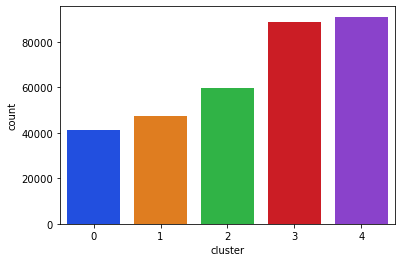

The groupings represents similar musical characteristics, or genres of music.

## Modeling

### Adding a Cluster Column

### Splitting Target and Features

First we will need to split our data into y, for the target, and X, for the predictive features.

In [632]:
y_train = train['popularity']
y_validate = validate['popularity']
y_test = test['popularity']

In [633]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [634]:
X_train = train[['duration_ms_scaled', 
                 'explicit', 
                 'energy', 
                 'danceability', 
                 'acousticness', 
                 'instrumentalness',
                 'tempo',
                 'loudness_scaled', 
                 'year_of_release',
                'liveness']]
X_validate = validate[['duration_ms_scaled',
                       'explicit', 
                       'energy',  
                       'danceability', 
                       'acousticness', 
                       'instrumentalness',
                       'tempo',
                        'loudness_scaled', 
                       'year_of_release',
                      'liveness']]
X_test = test[['duration_ms_scaled', 
               'explicit', 
               'energy', 
               'danceability', 
               'acousticness', 
               'instrumentalness',
               'tempo',
               'loudness_scaled', 
               'year_of_release',
              'liveness']]

### Baseline

In [635]:
# Predict taxvaluedollarcnt_pred_mean
popularity_pred_mean = y_train.popularity.mean()
y_train['popularity_pred_mean'] = popularity_pred_mean
y_validate['popularity_pred_mean'] = popularity_pred_mean

In [636]:
# compute taxvaluedollarcnt_pred_median
popularity_pred_median = y_train.popularity.median()
y_train['popularity_pred_median'] = popularity_pred_median
y_validate['popularity_pred_median'] = popularity_pred_median

In [637]:
y_train.head()

,popularity,popularity_pred_mean,popularity_pred_median
404070,39,27.557575,27.0
319183,7,27.557575,27.0
545921,28,27.557575,27.0
113274,11,27.557575,27.0
112835,22,27.557575,27.0


In [638]:
y_validate.head()

,popularity,popularity_pred_mean,popularity_pred_median
105487,39,27.557575,27.0
357570,17,27.557575,27.0
220588,11,27.557575,27.0
289161,21,27.557575,27.0
379587,47,27.557575,27.0


In [639]:
# RMSE of taxvaluedollarcnt_pred_mean
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_mean) ** (1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# RMSE of taxvaluedollarcnt_pred_median
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  18.37 
Validate/Out-of-Sample:  18.41
RMSE using Median
Train/In-Sample:  18.38 
Validate/Out-of-Sample:  18.42


### Build DataFrame

In [640]:
from sklearn.metrics import explained_variance_score

In [641]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [642]:
metric_df = pd.DataFrame()
metric_df = make_metric_df(y_validate.popularity,
                           y_validate.popularity_pred_median,
                           'median_baseline',
                          metric_df)

In [643]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.417868,-2.220446e-16


### Linear Regression (OLS)

In [644]:
#Create the model object
lm_1 = LinearRegression(normalize=True)

# fit the model to training data
lm_1.fit(X_train, y_train.popularity)

y_train['popularity_pred_lm_1'] = lm_1.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm_1) ** (1/2)

# predict validate
y_validate['popularity_pred_lm_1'] = lm_1.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm_1) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  14.539457126647553 
Validation/Out-of-Sample:  14.490400930355733


In [645]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm_1,
               'OLS Regressor, Select Features',
               metric_df)

In [646]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.417868,-2.220446e-16
1,"OLS Regressor, Select Features",14.490401,3.802414e-01


### LassoLars

In [647]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data.
lars.fit(X_train, y_train.popularity)

# predict train
y_train['popularity_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lars) ** (1/2)

# predict validate
y_validate['popularity_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  18.370462120887268 
Validation/Out-of-Sample:  18.406582761685563


In [648]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lars,
               'lasso_alpha_1',
               metric_df)

In [649]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.417868,-2.220446e-16
1,"OLS Regressor, Select Features",14.490401,3.802414e-01
2,lasso_alpha_1,18.406583,0.000000e+00


### Tweedie Regressor

In [650]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0.5)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.popularity)

# predict train
y_train['popularity_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_glm) ** (1/2)

# predict validate
y_validate['popularity_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0.5\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0.5
Training/In-Sample:  18.370462120887268 
Validation/Out-of-Sample:  18.40658276168556


In [651]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_glm,
               'GLM',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.417868,-2.220446e-16
1,"OLS Regressor, Select Features",14.490401,3.802414e-01
2,lasso_alpha_1,18.406583,0.000000e+00
3,GLM,18.406583,-2.220446e-16


### Linear Regression Second Degree

In [652]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

In [653]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.popularity)

# predict train
y_train['popularity_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm2) ** (1/2)

# predict validate
y_validate['popularity_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm2) ** (1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  14.142789524556347 
Validation/Out-of-Sample:  14.107810942245175


In [654]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm2,
               'quadratic',
               metric_df)

metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.417868,-2.220446e-16
1,"OLS Regressor, Select Features",14.490401,3.802414e-01
2,lasso_alpha_1,18.406583,0.000000e+00
3,GLM,18.406583,-2.220446e-16
4,quadratic,14.107811,4.125382e-01


### Linear Regression Third Degree

In [655]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate)
X_test_degree3 =  pf.transform(X_test)

In [656]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.popularity)

# predict train
y_train['popularity_pred_lm3'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm3) ** (1/2)

# predict validate
y_validate['popularity_pred_lm3'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm3) ** (1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  13.8331766722548 
Validation/Out-of-Sample:  13.818662407604975


In [657]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm3,
               'Third degree linear regression',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.417868,-2.220446e-16
1,"OLS Regressor, Select Features",14.490401,3.802414e-01
2,lasso_alpha_1,18.406583,0.000000e+00
3,GLM,18.406583,-2.220446e-16
4,quadratic,14.107811,4.125382e-01
5,Third degree linear regression,13.818662,4.363764e-01


### Linear Regression Fourth Degree

In [658]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree4 = pf.transform(X_validate)
X_test_degree4 =  pf.transform(X_test)

In [659]:
# create the model object
lm4 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm4.fit(X_train_degree4, y_train.popularity)

# predict train
y_train['popularity_pred_lm4'] = lm4.predict(X_train_degree4)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm4) ** (1/2)

# predict validate
y_validate['popularity_pred_lm4'] = lm4.predict(X_validate_degree4)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm4) ** (1/2)

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=4
Training/In-Sample:  13.626345423032943 
Validation/Out-of-Sample:  13.685215304402414


In [660]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm4,
               'Fourth degree linear regression',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.417868,-2.220446e-16
1,"OLS Regressor, Select Features",14.490401,3.802414e-01
2,lasso_alpha_1,18.406583,0.000000e+00
3,GLM,18.406583,-2.220446e-16
4,quadratic,14.107811,4.125382e-01
5,Third degree linear regression,13.818662,4.363764e-01
6,Fourth degree linear regression,13.685215,4.472073e-01


### Linear Regression Fifth Degree

In [550]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=5)

# fit and transform X_train_scaled
X_train_degree5 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree5 = pf.transform(X_validate)
X_test_degree5 =  pf.transform(X_test)

In [551]:
# create the model object
lm5 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm5.fit(X_train_degree5, y_train.popularity)

# predict train
y_train['popularity_pred_lm5'] = lm5.predict(X_train_degree5)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm5) ** (1/2)

# predict validate
y_validate['popularity_pred_lm5'] = lm5.predict(X_validate_degree5)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm5) ** (1/2)

print("RMSE for Polynomial Model, degrees=5\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=5
Training/In-Sample:  13.450967768991013 
Validation/Out-of-Sample:  15.818495410394158


In [553]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm5,
               'Fifth degree linear regression',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.417868,-2.220446e-16
1,"OLS Regressor, Select Features",14.490401,3.802414e-01
2,lasso_alpha_1,18.406583,0.000000e+00
3,GLM,18.406583,-2.220446e-16
4,quadratic,14.107811,4.125382e-01
5,Third degree linear regression,13.818662,4.363764e-01
6,Fourth degree linear regression,13.685215,4.472073e-01
7,Fifth degree linear regression,15.818495,2.614259e-01


In [569]:
metric_df = metric_df.sort_values(by = "RMSE_validate")

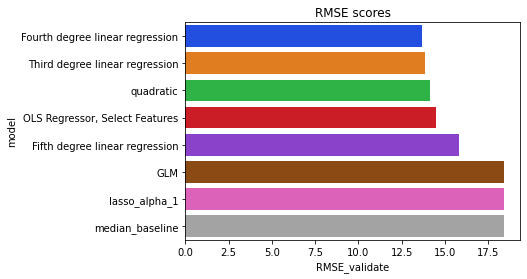

In [571]:
rmse_values = sns.barplot(x = metric_df.RMSE_validate, y= metric_df.model)
title = rmse_values.set(title = "RMSE scores")

The fourth degree linear regression model is our best model. 

Out of curiosity, let's see what song this model predicted to be the most popular.

In [627]:
y_train[y_train.popularity_pred_lm4 == y_train.popularity_pred_lm4.max()]

,popularity,popularity_pred_mean,popularity_pred_median,popularity_pred_lm_1,popularity_pred_lars,popularity_pred_glm,popularity_pred_lm2,popularity_pred_lm3,popularity_pred_lm4,popularity_pred_lm5
492473,52,27.557575,27.0,24.47333,27.557575,27.557575,11.455988,59.026053,76.362795,48.551861


In [628]:
df[492473:492474]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
492473,4NlsctTVxrTknjeiOKAdsr,Under a Waterfall (Relaxing Sounds),52,237772,0,['Sleep Sounds of Nature'],['59FRAcMcsHQupc8lupy5uH'],2011-08-24,0.0589,0.994,...,-22.764,1,0.0667,0.132,0.983,0.946,0.00001,47.986,4,2011


In [669]:
y_train.sort_values(by = "popularity_pred_lm4", ascending = False).head().index

Int64Index([492473, 188516, 91161, 157982, 90677], dtype='int64')

In [675]:
df.iloc[492473]

id                               4NlsctTVxrTknjeiOKAdsr
name                Under a Waterfall (Relaxing Sounds)
popularity                                           52
duration_ms                                      237772
explicit                                              0
artists                      ['Sleep Sounds of Nature']
id_artists                   ['59FRAcMcsHQupc8lupy5uH']
release_date                        2011-08-24 00:00:00
danceability                                     0.0589
energy                                            0.994
key                                                   1
loudness                                        -22.764
mode                                                  1
speechiness                                      0.0667
acousticness                                      0.132
instrumentalness                                  0.983
liveness                                          0.946
valence                                         

In [673]:
df.iloc[188516]

id                      3xsQw4CVKtM6xS9LnnRBLE
name                       Brown Noise 355 LPF
popularity                                  61
duration_ms                             182424
explicit                                     0
artists                           ['Granular']
id_artists          ['1jfnMuDBl5OaAoU0VwLD8m']
release_date               2019-01-11 00:00:00
danceability                              0.23
energy                                   0.899
key                                          1
loudness                               -31.604
mode                                         0
speechiness                             0.0512
acousticness                              0.95
instrumentalness                          0.96
liveness                                 0.111
valence                                0.00142
tempo                                   74.882
time_signature                               3
year_of_release                           2019
Name: 188516,

In [677]:
df.iloc[157982]

id                      0l1KG1a65GW39PsIEn1H5h
name                    White Noise Rain Sound
popularity                                  66
duration_ms                             187291
explicit                                     0
artists                   ['The Rain Library']
id_artists          ['0HVOvIhSNLpfo2rxfKdacJ']
release_date               2017-01-09 00:00:00
danceability                            0.0608
energy                                   0.939
key                                          1
loudness                               -26.324
mode                                         1
speechiness                              0.118
acousticness                             0.122
instrumentalness                         0.991
liveness                                 0.912
valence                                0.00558
tempo                                   73.234
time_signature                               5
year_of_release                           2017
Name: 157982,

In [661]:
y_validate[y_validate.popularity_pred_lm4 == y_validate.popularity_pred_lm4.max()]

,popularity,popularity_pred_mean,popularity_pred_median,popularity_pred_lm_1,popularity_pred_lars,popularity_pred_glm,popularity_pred_lm2,popularity_pred_lm3,popularity_pred_lm4
568269,33,27.557575,27.0,42.853343,27.557575,27.557575,51.326061,52.591725,195.016367


In [662]:
df[568269:568270]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
568269,1NHBwKuLmmLXRSLNMkRlN6,Calming Hair Dryer (Blow Dryer to Calm Your Baby),33,4320028,0,['Soothing White Noise for Relaxation'],['7ovU9nJ62sM3mWmsa5Wi8L'],2010-10-06,0.0,0.000046,...,-13.676,1,0.0,0.102,0.00582,0.443,0.0,0.0,0,2010


Interestingly, our model has predicted relaxing background noise as the songs most likely to be popular. 

## Out of Sample Evaluation

In [572]:
y_test.head()

,popularity
239867,11
246765,2
93968,0
46081,41
200642,2


In [573]:
# predict on test
y_test['popularity_pred_lm4'] = lm4.predict(X_test_degree4)

In [574]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.popularity, y_test.popularity_pred_lm4)**(1/2)

print("RMSE for OLS Model using Fourth Degreee LinearRegression with Polynomial Regression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using Fourth Degreee LinearRegression with Polynomial Regression
Out-of-Sample Performance:  13.716045398207926


In [575]:
y_test.head()

,popularity,popularity_pred_lm4
239867,11,19.788374
246765,2,7.568327
93968,0,52.592321
46081,41,21.179699
200642,2,17.053319


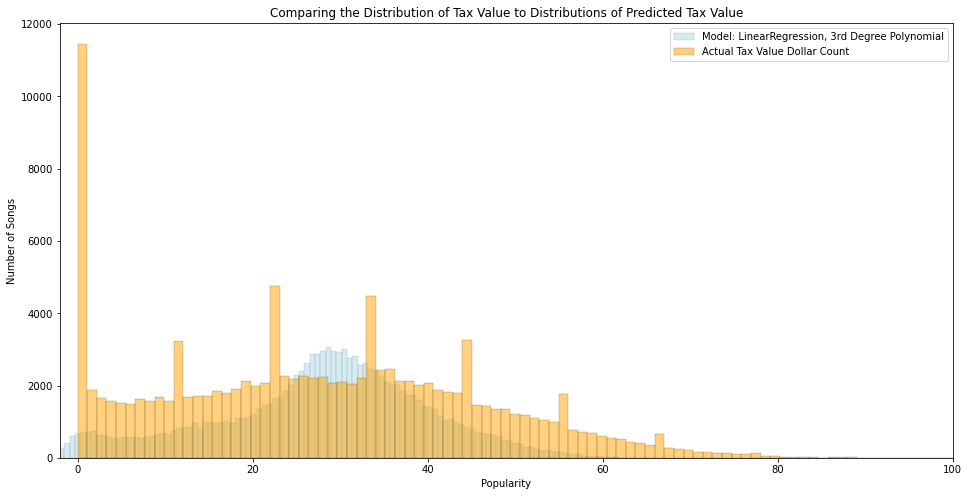

In [576]:
plt.figure(figsize=(16,8))
sns.histplot(y_test.popularity_pred_lm4, color='lightblue', alpha=.5, label="Model: LinearRegression, 3rd Degree Polynomial")
sns.histplot(y_test.popularity, color='orange', alpha=.5, label="Actual Tax Value Dollar Count")
plt.xlim(-2, 100)
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.title("Comparing the Distribution of Tax Value to Distributions of Predicted Tax Value")
plt.legend()
plt.show()

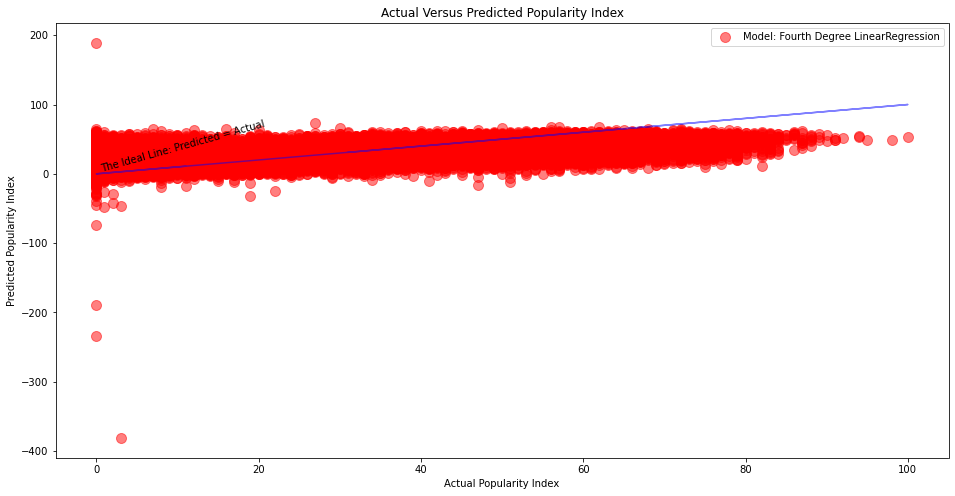

In [577]:
# y_validate.head()
plt.figure(figsize=(16,8))

plt.plot(y_test.popularity, y_test.popularity, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_test.popularity, y_test.popularity_pred_lm4, 
            alpha=.5, color="red", s=100, label="Model: Fourth Degree LinearRegression")
plt.legend()
plt.xlabel("Actual Popularity Index")
plt.ylabel("Predicted Popularity Index")
plt.title("Actual Versus Predicted Popularity Index")
plt.show()

## Bonus: Using Clustering to Categorize Music By Genre

We have already shown that we can use the features of music to predict the popularity of a song with reasonable accuracy. In this section of the project, I would like to show that we can also use clustering technology to group similar songs together by finding patterns in the data.

In [579]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year_of_release'],
      dtype='object')

In [595]:
X = train[['explicit',
'danceability',
'energy',
'mode',
'key',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'tempo',
'time_signature',
'duration_ms_scaled',
'loudness_scaled',
'valence',
'year_of_release']]

We will use the elbow method to determine our optimum number of clusters. The elbow method means that we will use a line graph to visualize number of cluster vs. inertia. We will look for the "elbow" in the line graph, the part where intertia drops off significantly.



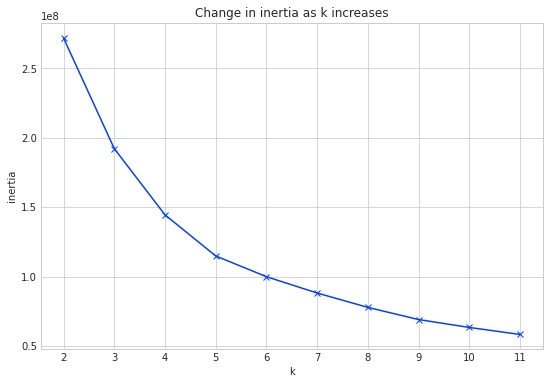

In [596]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [597]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

kmeans.predict(X)

array([5, 5, 0, ..., 1, 0, 2], dtype=int32)

In [598]:
train['cluster'] = kmeans.predict(X)

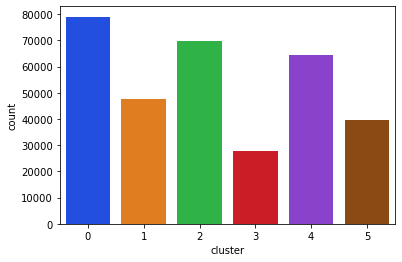

In [599]:
counts_by_cluster = sns.countplot(x = train.cluster)

In [600]:
train.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
404070,4RoQxXt8eSKeSFmhxLXu3x,Oru Ooril,39,279467,0,['Karthik'],['0LSPREIgGMZXCuKVel7LVD'],2003-09-27,0.594,0.633,...,0.281000,0.000000,0.0559,0.757,169.779,4,2003,0.051132,0.818305,5
319183,6FxUiq2HJbjyj4dBnXumrb,Lay down (Candles in the rain),7,274274,0,['Emilíana Torrini'],['08j69Ndyx1P7RLO3Janb5P'],1996-01-01,0.305,0.726,...,0.183000,0.000000,0.1340,0.592,167.728,4,1996,0.050171,0.809412,5
545921,3GcY5WwLab9cMJimIIqSh1,Playful,28,167413,0,['Frankie Animal'],['1YYYGhGZWuWjLTpxdggqpO'],2019-06-07,0.595,0.594,...,0.040500,0.000066,0.1340,0.566,90.053,4,2019,0.030382,0.781858,0
113274,0EvOQBSyW3uSfwpcaj5xLe,Time - 2013 Remaster,11,315855,0,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy'],2015-09-25,0.330,0.652,...,0.192000,0.000003,0.1050,0.369,145.186,4,2015,0.057871,0.787433,2
112835,4i3ilJFJbMwLLK3g0ECkXp,Jy Soen Soos 'n Engel,22,228653,0,['David Fourie'],['3372wrCwHX44K1vjwiZHoA'],2011-04-04,0.601,0.953,...,0.000192,0.000000,0.0971,0.731,125.964,4,2011,0.041723,0.834877,2
243942,1sapJ0ghCrB804CK2SQoLl,Океан и три реки,47,218867,0,['Valery Meladze'],['2igtm1MhKEpmG3PzToJT40'],2003-01-01,0.606,0.864,...,0.120000,0.000000,0.3880,0.724,95.012,4,2003,0.039911,0.841911,0
247901,7H9hrwz5IBDcHeHflB7dZh,Ya No Me Arrepiento,19,247693,0,['Sergio Denis'],['6J19N5JZkGRjuONpiizCIe'],1971-01-01,0.430,0.304,...,0.877000,0.000004,0.2170,0.242,77.332,4,1971,0.045249,0.750726,1
370623,4v3AuNSbedru7LpWlpg1Mp,Zor Yıllar,36,206053,0,"['Kemal Sahir Gürel', 'Erdal Güney', 'Hüseyin ...","['1WeO0UYvbcLvA27hupeCYV', '77PSs92ix6empuwnNu...",2007-01-03,0.289,0.414,...,0.894000,0.000008,0.2240,0.527,78.625,3,2007,0.037538,0.817337,0
145553,47YmRDI67DigzJtlcg0BGK,Sigo Buscando Un Amor,12,409133,0,['Roberto Roena'],['4i5rDrP2IqCdMgde0vIpyB'],1980-12-31,0.536,0.613,...,0.551000,0.007360,0.1290,0.798,104.461,4,1980,0.075144,0.816369,4
545576,1qBycURgOlsk4UtBsSY8XV,Lendaval Vaibal,16,266573,0,['Smilers'],['3gDHpjemovd3LuV3tHgjOq'],2014-04-16,0.665,0.869,...,0.059800,0.000000,0.5770,0.773,99.533,4,2014,0.048745,0.864105,0


We now have six groups of similar sounding songs.

In [603]:
train_0 = train[train.cluster == 0]

In [604]:
train_0.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
545921,3GcY5WwLab9cMJimIIqSh1,Playful,28,167413,0,['Frankie Animal'],['1YYYGhGZWuWjLTpxdggqpO'],2019-06-07,0.595,0.59400,...,0.0405,0.000066,0.134,0.566,90.053,4,2019,0.030382,0.781858,0
243942,1sapJ0ghCrB804CK2SQoLl,Океан и три реки,47,218867,0,['Valery Meladze'],['2igtm1MhKEpmG3PzToJT40'],2003-01-01,0.606,0.86400,...,0.1200,0.000000,0.388,0.724,95.012,4,2003,0.039911,0.841911,0
370623,4v3AuNSbedru7LpWlpg1Mp,Zor Yıllar,36,206053,0,"['Kemal Sahir Gürel', 'Erdal Güney', 'Hüseyin ...","['1WeO0UYvbcLvA27hupeCYV', '77PSs92ix6empuwnNu...",2007-01-03,0.289,0.41400,...,0.8940,0.000008,0.224,0.527,78.625,3,2007,0.037538,0.817337,0
545576,1qBycURgOlsk4UtBsSY8XV,Lendaval Vaibal,16,266573,0,['Smilers'],['3gDHpjemovd3LuV3tHgjOq'],2014-04-16,0.665,0.86900,...,0.0598,0.000000,0.577,0.773,99.533,4,2014,0.048745,0.864105,0
415692,5IgHqf44izKwUGgP5dGVlO,Sleep Tight (Instrumental Version),57,74859,0,['Nursery Rhymes 123'],['47tuSUJMhsa3twW6wgKdIW'],2016-01-26,0.833,0.00417,...,0.9790,0.012900,0.137,0.918,89.900,3,2016,0.013243,0.541139,0


Group 0 seems to be mostly upbeat songs with an electronic sound.

In [605]:
train_1 = train[train.cluster == 1]

In [607]:
train_1.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
247901,7H9hrwz5IBDcHeHflB7dZh,Ya No Me Arrepiento,19,247693,0,['Sergio Denis'],['6J19N5JZkGRjuONpiizCIe'],1971-01-01,0.430,0.3040,...,0.877,0.000004,0.2170,0.2420,77.332,4,1971,0.045249,0.750726,1
305610,01tdB0wTXWY4ue7GAySlWl,I've Got It Bad And That Ain T Good,11,372747,0,['Red Garland Quintet'],['0JsWkl2GlMvsvCQzYUQQ97'],1957-01-01,0.545,0.1710,...,0.965,0.921000,0.0976,0.1450,62.303,4,1957,0.068406,0.722634,1
44075,3OWfEECAO2MXsUH5u7J4bE,Get Back In Line,40,184160,0,['The Kinks'],['1SQRv42e4PjEYfPhS0Tk9E'],1970-11-27,0.323,0.5540,...,0.142,0.000044,0.2120,0.4200,93.428,4,1970,0.033483,0.800826,1
337889,5X5YjQO3OqHeAJzpQARMDB,"Hallelujah Chorus - From the Oratorio, ""Messiah""",12,245280,0,['Johnny Mathis'],['21LGsW7bziR4Ledx7WZ1Wf'],1963-10-04,0.404,0.3500,...,0.889,0.000215,0.2290,0.4670,96.672,4,1963,0.044802,0.772044,1
240147,3D4xY8ldSzNHDMP4Zynady,Amparo,32,219693,0,['Antônio Carlos Jobim'],['3pO5VjZ4wOHCMBXOvbMISG'],1970-01-01,0.225,0.0763,...,0.982,0.887000,0.1280,0.0378,82.881,4,1970,0.040063,0.593006,1


Group 1 is more melancholic, slower songs.

In [609]:
train_2 = train[train.cluster == 2]

In [611]:
train_2.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
113274,0EvOQBSyW3uSfwpcaj5xLe,Time - 2013 Remaster,11,315855,0,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy'],2015-09-25,0.330,0.652,...,0.192000,0.000003,0.1050,0.369,145.186,4,2015,0.057871,0.787433,2
112835,4i3ilJFJbMwLLK3g0ECkXp,Jy Soen Soos 'n Engel,22,228653,0,['David Fourie'],['3372wrCwHX44K1vjwiZHoA'],2011-04-04,0.601,0.953,...,0.000192,0.000000,0.0971,0.731,125.964,4,2011,0.041723,0.834877,2
284313,27CunNfh9sPzaNhRirLPjA,Fortunate Fool,38,228653,0,['Jack Johnson'],['3GBPw9NK25X1Wt2OUvOwY3'],2001-02-01,0.772,0.284,...,0.542000,0.001720,0.1090,0.328,129.326,4,2001,0.041723,0.766453,2
262296,2g7ZMGF9V9vuky7fYb2NVZ,Čert a Kača,17,901680,0,"['Marián Labuda', 'R.Mihina', 'M.Matejka', 'V....","['1mHKvmQJOQVhd1nLEkiAZr', '6FDvKh65apZwn8Xr0S...",2002-03-07,0.714,0.437,...,0.826000,0.000000,0.0655,0.487,119.787,4,2002,0.166354,0.740405,2
371127,3VYxTZHWMcuzSSgR03msGs,Eski,41,302138,0,['Şebnem Ferah'],['74xBVPWYoSf5pvo5IkePRO'],2009-12-19,0.552,0.675,...,0.333000,0.000000,0.1070,0.317,125.898,4,2009,0.055331,0.860680,2


Group 2 has an acoustic rock-and-roll quality.

In [613]:
train_3 = train[train.cluster == 3]

In [614]:
train_3.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
267026,0St7qoRogQ9B9uIqmLdjIr,Red Clay,20,728533,0,['Freddie Hubbard'],['0fTHKjepK5HWOrb2rkS5Em'],1970-01-01,0.530,0.388,...,0.338,0.261000,0.0958,0.587,139.339,4,1970,0.134290,0.715999,3
189759,5oD4obArjBOP28YjclhcNr,O Astronauta - Instrumental,19,181613,0,"['Odette Lara', 'Vinícius de Moraes']","['1qCTWVxt74ULl0u12pjnTc', '5HlnN6xF2MD87KhGRm...",1963-01-01,0.423,0.479,...,0.186,0.000002,0.2550,0.591,153.212,4,1963,0.033012,0.736872,3
2186,1P3YFEDFTCSSQ4KVoUgO7t,Smashin' Thirds,4,184920,0,['Fats Waller'],['0DYWCXTkNqGFZIf67SrWEa'],1926-01-01,0.541,0.247,...,0.982,0.868000,0.1310,0.812,111.664,4,1926,0.033624,0.625244,3
136319,7nKfyxYFXf5HdwSbeLFq1l,Blueberry Hill,0,199101,0,['Russ Morgan'],['4p2WNjwHrHBUD9XJBmbf7H'],1944-01-01,0.313,0.218,...,0.799,0.006770,0.1280,0.316,115.668,4,1944,0.036250,0.739790,3
514476,08CkhcDtEogvbDzCIOBivc,Summertime,0,201520,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1950-09-01,0.268,0.322,...,0.988,0.288000,0.6020,0.319,146.201,4,1950,0.036698,0.711699,3


Group 3 has an instrumental, jazzy, old-time feel.

In [624]:
train_4 = train[train.cluster == 4]

In [625]:
train_4.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
145553,47YmRDI67DigzJtlcg0BGK,Sigo Buscando Un Amor,12,409133,0,['Roberto Roena'],['4i5rDrP2IqCdMgde0vIpyB'],1980-12-31,0.536,0.613,...,0.5510,0.007360,0.129,0.798,104.461,4,1980,0.075144,0.816369,4
452182,1i1SZziMzvtv49MXiJKmcv,Evangelina,19,225253,0,['Jonathan Edwards'],['7gyVuJLsatWofXCAw1SGxM'],1977-01-01,0.640,0.325,...,0.4410,0.293000,0.150,0.765,132.707,4,1977,0.041093,0.679553,4
207534,4AOQOmkh8YT3HA8e0xBw76,Cervecita,16,166547,0,['Los Shapis'],['3LorjMdYWKEtf3wdNtjM6v'],1995-08-08,0.594,0.685,...,0.7190,0.000082,0.224,0.892,113.193,4,1995,0.030222,0.847195,4
167720,54toym5sP7H1vi8NxMTlFH,Desperate Dreams,37,286933,0,['Survivor'],['26bcq2nyj5GB7uRr558iQg'],1988-09-25,0.625,0.646,...,0.0691,0.000035,0.114,0.362,121.647,4,1988,0.052515,0.754704,4
377606,6yPVqp3Nt2mFzvdExaIWP9,J'attendrai,33,177973,0,['Claude François'],['0P2p1bqVyP2EgqubwjTBUJ'],1993-01-01,0.521,0.587,...,0.2850,0.000000,0.114,0.619,123.587,4,1993,0.032338,0.852325,4


Group 4 has a traditional Latin/country sound.

In [621]:
train_5 = train[train.cluster == 5]

In [622]:
train_5.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled,cluster
404070,4RoQxXt8eSKeSFmhxLXu3x,Oru Ooril,39,279467,0,['Karthik'],['0LSPREIgGMZXCuKVel7LVD'],2003-09-27,0.594,0.633,...,0.2810,0.0,0.0559,0.757,169.779,4,2003,0.051132,0.818305,5
319183,6FxUiq2HJbjyj4dBnXumrb,Lay down (Candles in the rain),7,274274,0,['Emilíana Torrini'],['08j69Ndyx1P7RLO3Janb5P'],1996-01-01,0.305,0.726,...,0.1830,0.0,0.1340,0.592,167.728,4,1996,0.050171,0.809412,5
275579,4B58w2sCk7y7mcIdIoP7Gd,Especially for You,54,223013,0,['MYMP'],['5elcNQkZ6FCZA3grSOMngY'],2005-03-10,0.698,0.398,...,0.4990,0.0,0.1800,0.758,163.028,4,2005,0.040678,0.784838,5
301637,2QQ0lfEAu3ncUHM3C6Rkg3,Is Anybody Home?,45,218000,0,['Our Lady Peace'],['1lqW59DUEKqvcHc8mVWBtH'],1999-09-06,0.442,0.896,...,0.0219,0.0,0.3830,0.573,155.044,4,1999,0.039750,0.850635,5
557744,27K9pfqACmZxsvNpJ8FSxq,Return to Myself,40,269110,0,['Mari Hamada'],['2lQwmHGmTnEu1jjfAgUAcq'],2008-10-22,0.390,0.922,...,0.0770,0.0,0.0674,0.560,167.729,4,2008,0.049215,0.880047,5


Group 5 has an uplifting, energetic, gospel-like quality. 